In [1]:
#For data processing and visualization
import numpy as np 
import pandas as pd 

import seaborn as sns


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


#For Clustering Analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#For Prediction Modelling
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Lets read the dataset
data = pd.read_csv('data.csv')

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
#lets check the shapte of dataset
print("Shape of the Dataset :", data.shape)


Shape of the Dataset : (2200, 8)


In [5]:
#lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
#lets check if there is any missing value present in the database
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#lets check the Crops present in this Dataset
data['label'].value_counts()

coconut        100
rice           100
banana         100
grapes         100
apple          100
muskmelon      100
pomegranate    100
lentil         100
watermelon     100
papaya         100
mango          100
chickpea       100
mungbean       100
orange         100
blackgram      100
maize          100
pigeonpeas     100
coffee         100
cotton         100
jute           100
kidneybeans    100
mothbeans      100
Name: label, dtype: int64

In [8]:
#lets check the summary for all the crops
print("Average Ratio of Nitrogen in the soil : {0:2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0:2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil : {0:2f}".format(data['K'].mean()))
print("Average Temparature in celsius : {0:f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.551818
Average Ratio of Phosphorous in the soil : 53.362727
Average Ratio of Potassium in the soil : 48.149091
Average Temparature in celsius : 25.616244
Average Relative Humidity in % : 71.481779
Average PH Value of the soil : 6.469480
Average Rainfall in mm : 103.463655


In [9]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for nitrogen")
    print("Minimum amount of nitrogen required :", x['N'].min())
    print("average amount of nitrogen required :", x['N'].mean())
    print("Maximum amount of nitrogen required :", x['N'].max())
    
    print("----------------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum amount of phosphorus required :", x['P'].min)
    print("average amount of phosphorus required :", x['P'].mean)
    print("Maximum amount of phosphorus required :", x['P'].max)
    
    print("----------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum amount of Potassium required :", x['K'].min)
    print("average amount of Potassium required :", x['K'].mean)
    print("Maximum amount of Potassium required :", x['K'].max) 

    print("----------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum amount of Temperature required :{0:.2f}".format(x['temperature'].min()))
    print("average amount of Temperature required :{0:.2f}".format(x['temperature'].mean()))
    print("Maximum amount of Temperature required :{0:.2f}".format(x['temperature'].max()))

    print("----------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required :{0:.2f}".format(x['humidity'].min()))
    print("average Humidity required :{0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required :{0:.2f}".format(x['humidity'].max()))    
    
    print("----------------------------------------------")
    print("Statistics for ph")
    print("Minimum PH required :{0:.2f}".format(x['ph'].min()))
    print("average PH Temperature required :{0:.2f}".format(x['ph'].mean()))
    print("Maximum PH Temperature required :{0:.2f}".format(x['ph'].max()))

interactive(children=(Dropdown(description='crops', options=('coconut', 'rice', 'banana', 'grapes', 'apple', '…

In [10]:
@interact
def compare(conditions = ['N','P','K', 'temperature', 'ph','humidity', 'rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions ].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions ].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions ].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [11]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("-----------------------------")
print("Crops which requires very High Ratio of Nitrogen content in Soil:", data [data['N'] > 120] [ 'label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200][ 'label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] <20]['label'].unique())
print("Crops which requires very Low PH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
-----------------------------
Crops which requires very High Ratio of Nitrogen content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low PH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [12]:
@interact
def compare(conditions = ['N', 'p', 'k', 'temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("..........................................")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'p', 'k', 'temperature', 'ph', 'humidit…

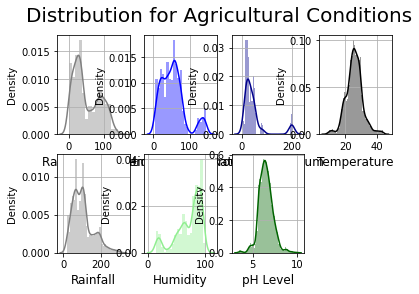

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'grey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'blue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 3)
sns.distplot(data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()
plt. subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()
plt. subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()
plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [13]:
### Lets understand which crops can only be Grown in summer season, Winter Season and Rainy Season
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] <20) & (data['humidity'] > 30)]['label'].unique())
print("----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [14]:
from sklearn.cluster import KMeans
 
#removing the Lables column
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)


(2200, 7)


In [21]:
# Lets implement the K Means algorithm to perform Clustering analysis
km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# Lets find out the Results
a = data['label']
y_means = pd.DataFrame (y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename (columns = {0: 'cluster'})

# Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("----------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("----------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("----------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
----------------------------------------------------
Crops in Forth Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [16]:
# Lets determine the Optimum Number of clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

NameError: name 'plt' is not defined

In [17]:
#Lets split the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("shape of x", x.shape)
print("shape of y", y.shape)


shape of x (2200, 7)
shape of y (2200,)


In [23]:
#lets create training and teasting sets for validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

print("the shape of x train:", x_train.shape)
print("the shape of x test:", x_test.shape)
print("the shape of y train:",y_train.shape)
print("the shape of y test:", y_test.shape)

the shape of x train: (1760, 7)
the shape of x test: (440, 7)
the shape of y train: (1760,)
the shape of y test: (440,)


In [24]:
# Lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [25]:
print("Accuracy for logistic regression classifier on the set : {:.4f}".format(model.score(x_train, y_train)))

Accuracy for logistic regression classifier on the set : 0.9693


In [26]:
# Lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

NameError: name 'plt' is not defined

In [27]:
#Lets print the classification Report also
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [28]:
D = DecisionTreeClassifier()

In [29]:
D.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
D.score(x_train, y_train)

1.0

In [31]:
D.score(x_test, y_test)

0.990909090909091

In [32]:
y_pred = D.predict(x_test)
print(y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'rice'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'chickpea' 'pomegranate' 'rice' 'maize' 'muskmelon'
 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'mothbeans' 'maize'
 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'blackgram' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize' '

In [33]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.95      1.00      0.98        21
    chickpea       1.00      0.92      0.96        25
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.95      0.98        22
 kidneybeans       0.90      1.00      0.95        18
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

In [34]:
#evolute model
print(metrics.accuracy_score(y_test, y_pred))

0.990909090909091


In [35]:
#lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [37]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("the suggested Crop for given climatic condition is: ",prediction)

the suggested Crop for given climatic condition is:  ['rice']
